# INSY695 Group Project

## Step 2: Data Exploration

After aggregating all the datasets, we then start exploring the data.

In [140]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import shap
               

## 2.1 <b>Import Dataset</b>

In [141]:
data = pd.read_csv("combined_data.csv")

## 2.2 <b>Check How Data Look Like</b>

In [142]:
data.shape # 52610 rows, 29 columns

(52610, 30)

In [143]:
data.head()

Unnamed: 0     game_id  team_id   HoA    won settled_in        head_coach  \
0           0  2016020045        4  away  False        REG      Dave Hakstol   
1           1  2016020045       16  home   True        REG  Joel Quenneville   
2           2  2017020812       24  away   True         OT     Randy Carlyle   
3           3  2017020812        7  home  False         OT      Phil Housley   
4           4  2015020314       21  away   True        REG       Patrick Roy   

   goals  shots  hits  ...  home_rink_side_start           venue  \
0    4.0   27.0  30.0  ...                 right   United Center   
1    7.0   28.0  20.0  ...                 right   United Center   
2    4.0   34.0  16.0  ...                  left  KeyBank Center   
3    3.0   33.0  17.0  ...                  left  KeyBank Center   
4    4.0   29.0  17.0  ...                 right      MTS Centre   

   venue_time_zone_id  venue_time_zone_offset  venue_time_zone_tz  \
0     America/Chicago                      -5                 CDT   
1     America/Chicago                      -5                 CDT   
2    America/New_York                      -4                 EDT   
3    America/New_York                      -4                 EDT   
4    America/Winnipeg                      -5                 CDT   

     timeOnIce  evenTimeOnIce shortHandedTimeOnIce powerPlayTimeOnIce  \
0   990.833333     841.388889            55.555556          93.888889   
1   981.333333     836.777778            75.111111          69.444444   
2  1002.222222     879.611111            28.444444          94.166667   
3   999.222222     888.333333            75.333333          35.555556   
4   986.666667     844.722222            53.333333          88.611111   

  goalie_replacement  
0                Yes  
1                 No  
2                 No  
3                 No  
4                 No  

[5 rows x 30 columns]

## 2.3 Check Missing Values

In [144]:
data.isnull().sum()

Unnamed: 0                    0
game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   28
goals                         8
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2392
type                          0
date_time_GMT                 0
home_rink_side_start       2392
venue                         0
venue_time_zone_id            0
venue_time_zone_offset        0
venue_time_zone_tz            0
timeOnIce                    28
evenTimeOnIce                28
shortHandedTimeOnIce         28
powerPlayTimeOnIce           28
goalie_replacement           35
dtype: int64

## 2.4 <b>Remove Irrelevant Column</b>

In [145]:
data = data.drop(columns='Unnamed: 0')

In [146]:
data.head()

game_id  team_id   HoA    won settled_in        head_coach  goals  \
0  2016020045        4  away  False        REG      Dave Hakstol    4.0   
1  2016020045       16  home   True        REG  Joel Quenneville    7.0   
2  2017020812       24  away   True         OT     Randy Carlyle    4.0   
3  2017020812        7  home  False         OT      Phil Housley    3.0   
4  2015020314       21  away   True        REG       Patrick Roy    4.0   

   shots  hits  pim  ...  home_rink_side_start           venue  \
0   27.0  30.0  6.0  ...                 right   United Center   
1   28.0  20.0  8.0  ...                 right   United Center   
2   34.0  16.0  6.0  ...                  left  KeyBank Center   
3   33.0  17.0  8.0  ...                  left  KeyBank Center   
4   29.0  17.0  9.0  ...                 right      MTS Centre   

   venue_time_zone_id  venue_time_zone_offset  venue_time_zone_tz  \
0     America/Chicago                      -5                 CDT   
1     America/Chicago                      -5                 CDT   
2    America/New_York                      -4                 EDT   
3    America/New_York                      -4                 EDT   
4    America/Winnipeg                      -5                 CDT   

     timeOnIce evenTimeOnIce shortHandedTimeOnIce powerPlayTimeOnIce  \
0   990.833333    841.388889            55.555556          93.888889   
1   981.333333    836.777778            75.111111          69.444444   
2  1002.222222    879.611111            28.444444          94.166667   
3   999.222222    888.333333            75.333333          35.555556   
4   986.666667    844.722222            53.333333          88.611111   

  goalie_replacement  
0                Yes  
1                 No  
2                 No  
3                 No  
4                 No  

[5 rows x 29 columns]

## 2.5 <b>Check Variable Types</b>

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

In [132]:
#Generate a HTML report
import pandas_profiling
profile = data.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2.6 <b>Examine Data Distribution of Each Variable<b/>

In this section, we use histograms to look at the distribution of numeric variables. For categorical variables, we count the frequency of each value.

In [148]:
data["HoA"].value_counts()

away    26305
home    26305
Name: HoA, dtype: int64

In [149]:
data["won"].value_counts()

False    26947
True     25663
Name: won, dtype: int64

In [150]:
data["settled_in"].value_counts()

REG    40306
OT     12256
tbc       48
Name: settled_in, dtype: int64

In [151]:
data["head_coach"].value_counts()

Barry Trotz         1804
Joel Quenneville    1599
John Tortorella     1563
Claude Julien       1500
Mike Babcock        1475
                    ... 
Cap Raeder             1
Dan Lacroix            1
Terry O'Reilly         1
Martin Raymond         1
Al Arbour              1
Name: head_coach, Length: 146, dtype: int64

<AxesSubplot:>

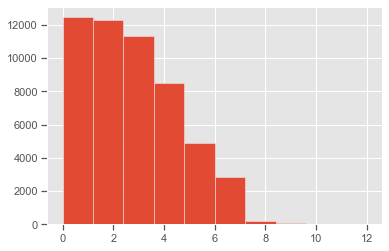

In [152]:
data["goals"].hist()


<AxesSubplot:>

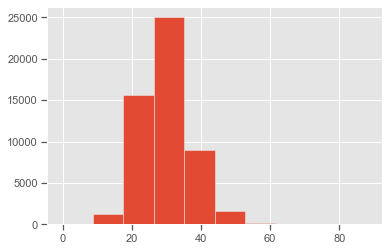

In [153]:
data["shots"].hist()

<AxesSubplot:>

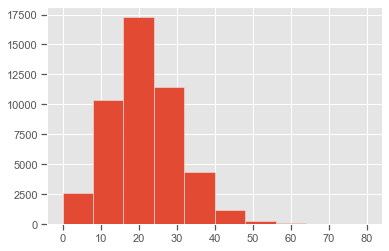

In [154]:
data["hits"].hist()

<AxesSubplot:>

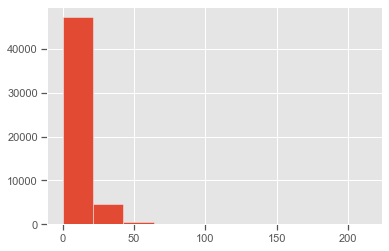

In [155]:
data["pim"].hist()

<AxesSubplot:>

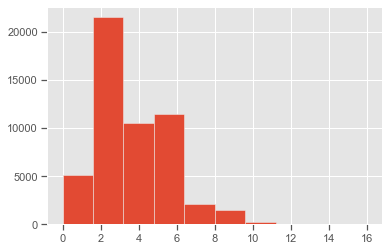

In [156]:
data["powerPlayOpportunities"].hist()

<AxesSubplot:>

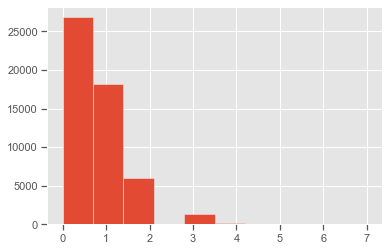

In [157]:
data["powerPlayGoals"].hist()

<AxesSubplot:>

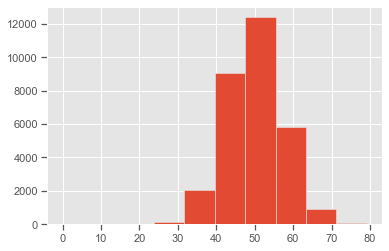

In [158]:
data["faceOffWinPercentage"].hist()

<AxesSubplot:>

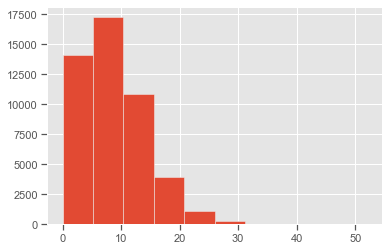

In [159]:
data["giveaways"].hist()

<AxesSubplot:>

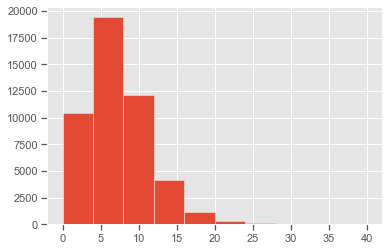

In [160]:
data["takeaways"].hist()

<AxesSubplot:>

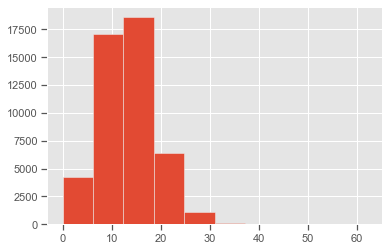

In [161]:
data["blocked"].hist()

<AxesSubplot:>

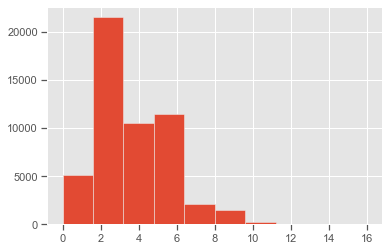

In [162]:
data["powerPlayOpportunities"].hist()

In [163]:
data["startRinkSide"].value_counts()

left     26852
right    23366
Name: startRinkSide, dtype: int64

In [164]:
data["type"].value_counts()

R    50342
P     2248
A       20
Name: type, dtype: int64

In [165]:
# Check the format of variable "date_time_GMT"
data["date_time_GMT"].value_counts()

2019-11-28T00:00:00Z    32
2018-12-02T00:00:00Z    28
2018-11-11T00:00:00Z    28
2020-02-05T00:00:00Z    28
2018-11-25T00:00:00Z    28
                        ..
2003-04-03T03:30:00Z     2
2006-03-14T02:00:00Z     2
2016-04-03T21:00:00Z     2
2015-10-17T02:30:00Z     2
2015-04-20T23:00:00Z     2
Name: date_time_GMT, Length: 14468, dtype: int64

In [166]:
# Extract value of year from variable "data_time_GMT"
data['year']=""
for i in range(52610):
    data['year'][i]=data['date_time_GMT'][i][0:4]

2019    5492
2018    3948
2013    2814
2017    2738
2015    2658
2011    2638
2016    2624
2009    2560
2014    2540
2001    2502
2006    2480
2007    2460
2003    2454
2008    2402
2002    2402
2020    2386
2010    2382
2012    1514
2004    1354
2005    1134
2000    1128
Name: year, dtype: int64


<AxesSubplot:>

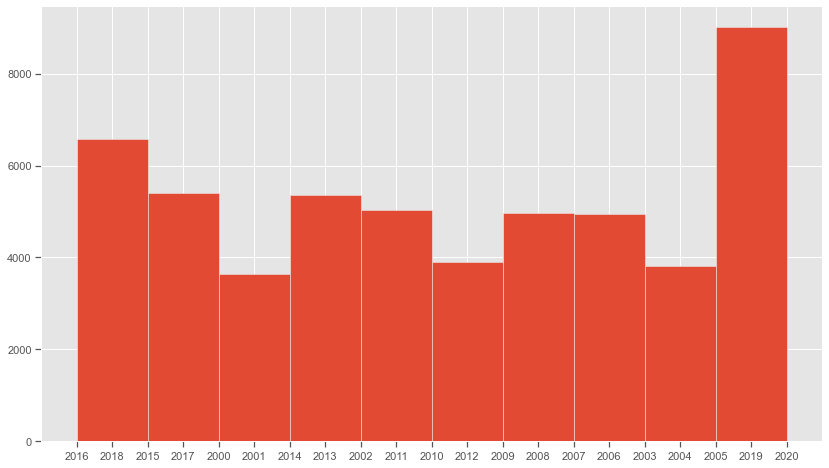

In [167]:
# Check distribution of "year"
print(data["year"].value_counts())
data["year"].hist(figsize=(14,8))


In [168]:
# Extract value of month from variable "data_time_GMT"
data['month']=""
for i in range(52610):
    data['month'][i]=data['date_time_GMT'][i][5:7]

<AxesSubplot:>

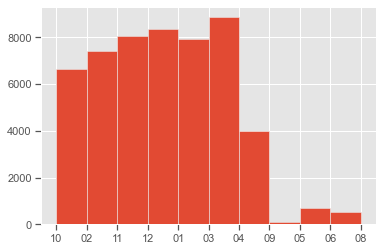

In [169]:
# Check distribution of "year"
data["month"].hist()

In [170]:
data["home_rink_side_start"].value_counts()

right    26852
left     23366
Name: home_rink_side_start, dtype: int64

In [171]:
data["venue"].value_counts()

Madison Square Garden                                               1764
United Center                                                       1742
Nationwide Arena                                                    1702
Xcel Energy Center                                                  1702
Pepsi Center                                                        1682
                                                                    ... 
TCF Bank Stadium                                                       2
BC Place                                                               2
Centre Bell                                                            2
Fenway Park                                                            2
Nationals Park                                                         2
Name: venue, Length: 116, dtype: int64

In [172]:
data["venue_time_zone_id"].value_counts()

America/New_York       23480
America/Chicago         8788
America/Los_Angeles     5756
America/Denver          3426
America/Vancouver       1740
America/Montreal        1738
America/Detroit         1712
America/Toronto         1702
America/Phoenix         1694
America/Edmonton        1678
America/Winnipeg         896
Name: venue_time_zone_id, dtype: int64

In [173]:
data["venue_time_zone_offset"].value_counts()

-4    23994
-5    12610
-7     8600
-6     5972
-8     1434
Name: venue_time_zone_offset, dtype: int64

In [174]:
data["venue_time_zone_tz"].value_counts()

EDT    23994
CDT     7972
PDT     6062
EST     4638
MDT     4260
MST     2538
CST     1712
PST     1434
Name: venue_time_zone_tz, dtype: int64

<AxesSubplot:>

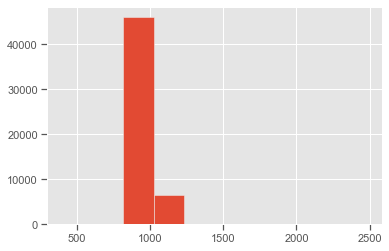

In [175]:
data["timeOnIce"].hist()


<AxesSubplot:>

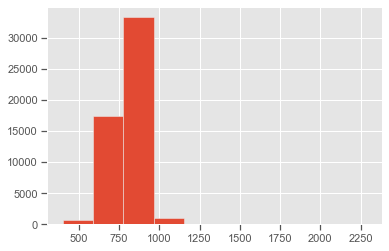

In [176]:
data["evenTimeOnIce"].hist()

<AxesSubplot:>

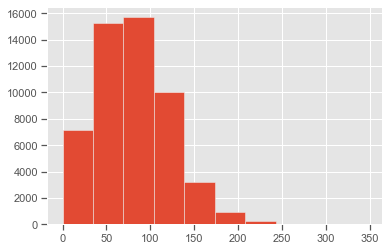

In [177]:
data["shortHandedTimeOnIce"].hist()

<AxesSubplot:>

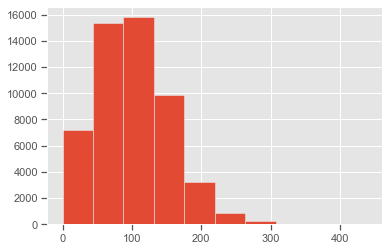

In [178]:
data["powerPlayTimeOnIce"].hist()

In [179]:
data["goalie_replacement"].value_counts()

No     48498
Yes     4077
Name: goalie_replacement, dtype: int64

## 2.7 <b>Check Outliers for Numeric Values</b>

In this section, we use boxplots to observe how many outliers there are for each variable.

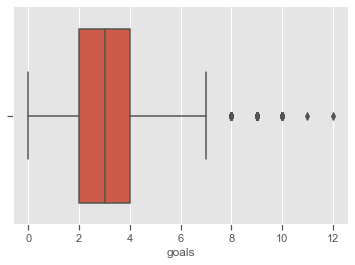

In [180]:
import seaborn as sns 
sns.boxplot(data['goals']) 
sns.despine()

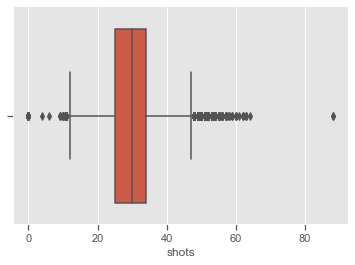

In [181]:
sns.boxplot(data['shots']) 
sns.despine()

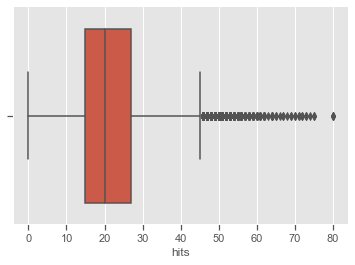

In [182]:
sns.boxplot(data['hits']) 
sns.despine()

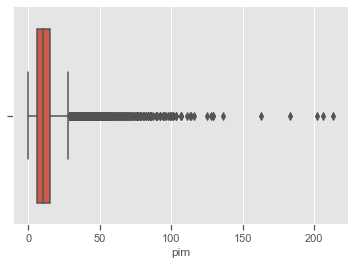

In [183]:
sns.boxplot(data['pim']) 
sns.despine()

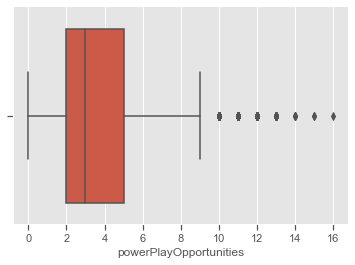

In [184]:
sns.boxplot(data['powerPlayOpportunities']) 
sns.despine()

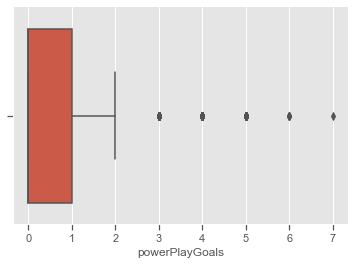

In [185]:
sns.boxplot(data['powerPlayGoals']) 
sns.despine()

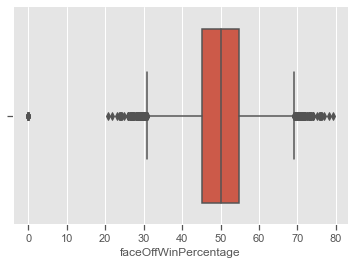

In [186]:
sns.boxplot(data['faceOffWinPercentage']) 
sns.despine()

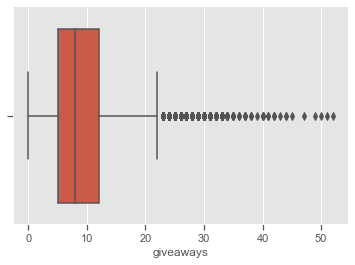

In [187]:
sns.boxplot(data['giveaways']) 
sns.despine()

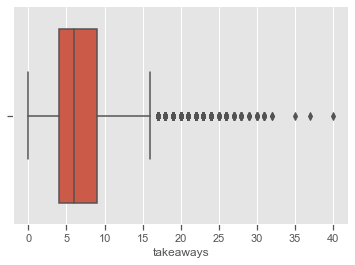

In [188]:
sns.boxplot(data['takeaways']) 
sns.despine()

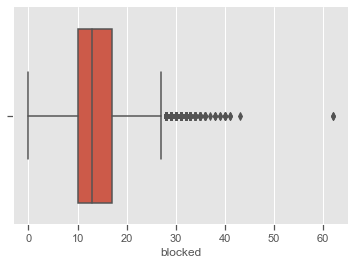

In [189]:
sns.boxplot(data['blocked']) 
sns.despine()

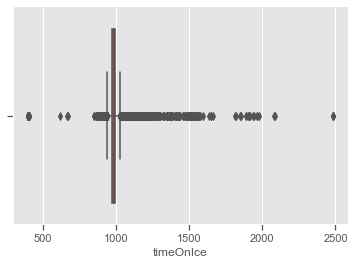

In [190]:
sns.boxplot(data['timeOnIce']) 
sns.despine()

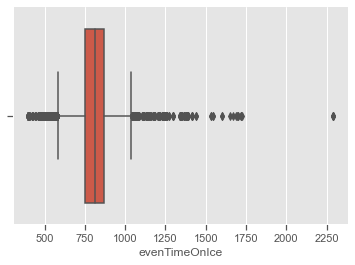

In [191]:
sns.boxplot(data['evenTimeOnIce']) 
sns.despine()

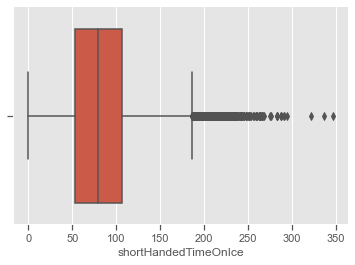

In [192]:
sns.boxplot(data['shortHandedTimeOnIce']) 
sns.despine()

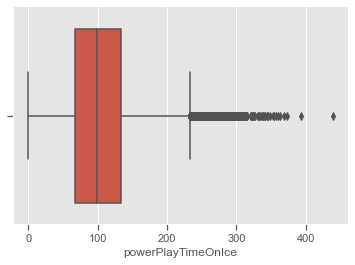

In [193]:
sns.boxplot(data['powerPlayTimeOnIce']) 
sns.despine()

## 2.8 <b>Check Relationships between Variables</b>

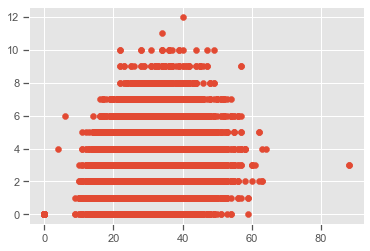

In [194]:
import matplotlib.pyplot as plt
plt.scatter(data['shots'], data['goals'])

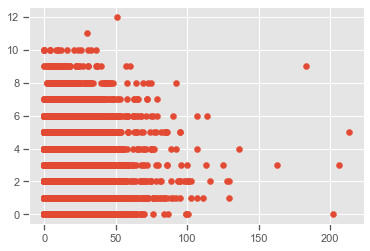

In [195]:
plt.scatter(data['pim'], data['goals'])

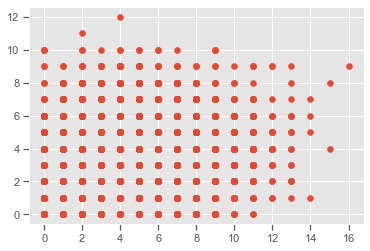

In [196]:
plt.scatter(data['powerPlayOpportunities'], data['goals'])

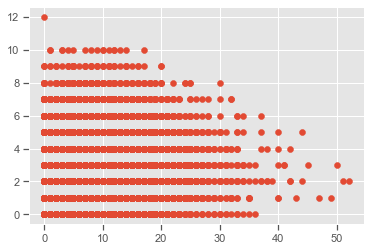

In [197]:
plt.scatter(data['giveaways'], data['goals'])

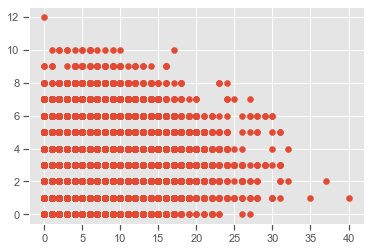

In [198]:
plt.scatter(data['takeaways'], data['goals'])

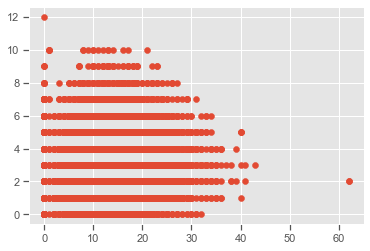

In [199]:
plt.scatter(data['blocked'], data['goals'])

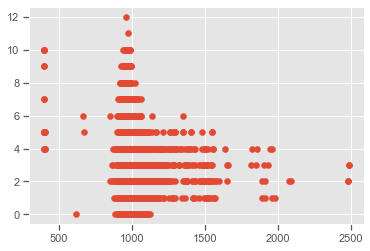

In [200]:
plt.scatter(data['timeOnIce'], data['goals'])

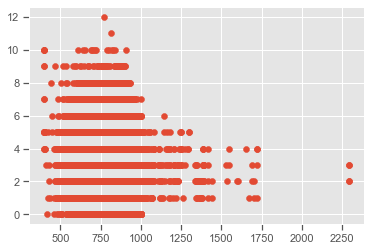

In [201]:
plt.scatter(data['evenTimeOnIce'], data['goals'])

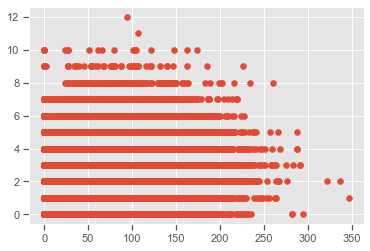

In [202]:
plt.scatter(data['shortHandedTimeOnIce'], data['goals'])

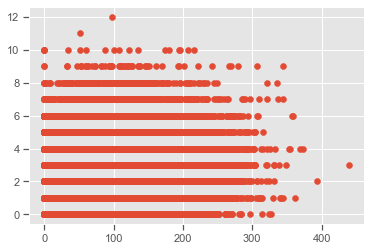

In [203]:
plt.scatter(data['powerPlayTimeOnIce'], data['goals'])

## 2.9 Check Correlations among Variables

<b>Correlation Matrix</b>

In [204]:
data.corr()

game_id   team_id       won     goals     shots  \
game_id                 1.000000  0.122000  0.035644  0.037271  0.154728   
team_id                 0.122000  1.000000 -0.001185 -0.007874 -0.019162   
won                     0.035644 -0.001185  1.000000  0.596658  0.025200   
goals                   0.037271 -0.007874  0.596658  1.000000  0.150048   
shots                   0.154728 -0.019162  0.025200  0.150048  1.000000   
hits                    0.342978  0.011246 -0.039339 -0.064944  0.050009   
pim                    -0.282431 -0.044171 -0.040231  0.038303 -0.082409   
powerPlayOpportunities -0.344502 -0.032043  0.014049  0.097074  0.120679   
powerPlayGoals         -0.092124 -0.014289  0.240823  0.459827  0.083634   
faceOffWinPercentage   -0.001894  0.009204  0.030458  0.035202  0.138162   
giveaways               0.133770 -0.028017 -0.004803  0.012130  0.048839   
takeaways               0.145461 -0.002926  0.104937  0.095462  0.099960   
blocked                 0.278443 -0.005821  0.166406  0.093338 -0.074203   
venue_time_zone_offset -0.200089 -0.455311 -0.001869 -0.005184  0.008603   
timeOnIce               0.112090 -0.032154 -0.061166 -0.075527  0.196708   
evenTimeOnIce           0.377174  0.016848 -0.014459 -0.045709  0.098488   
shortHandedTimeOnIce   -0.319614 -0.035961  0.027564  0.036049 -0.164846   
powerPlayTimeOnIce     -0.320463 -0.027887 -0.046930 -0.010313  0.119446   

                            hits       pim  powerPlayOpportunities  \
game_id                 0.342978 -0.282431               -0.344502   
team_id                 0.011246 -0.044171               -0.032043   
won                    -0.039339 -0.040231                0.014049   
goals                  -0.064944  0.038303                0.097074   
shots                   0.050009 -0.082409                0.120679   
hits                    1.000000 -0.062390               -0.187209   
pim                    -0.062390  1.000000                0.290575   
powerPlayOpportunities -0.187209  0.290575                1.000000   
powerPlayGoals         -0.073287  0.125317                0.416477   
faceOffWinPercentage    0.003448 -0.008737                0.045209   
giveaways               0.202028 -0.067719               -0.011836   
takeaways               0.165264 -0.068962               -0.059365   
blocked                 0.291648 -0.063378               -0.163430   
venue_time_zone_offset -0.014920  0.045888                0.047011   
timeOnIce               0.188226 -0.219771               -0.102390   
evenTimeOnIce           0.253318 -0.473263               -0.699930   
shortHandedTimeOnIce   -0.133942  0.531020                0.291043   
powerPlayTimeOnIce     -0.182580  0.233566                0.921578   

                        powerPlayGoals  faceOffWinPercentage  giveaways  \
game_id                      -0.092124             -0.001894   0.133770   
team_id                      -0.014289              0.009204  -0.028017   
won                           0.240823              0.030458  -0.004803   
goals                         0.459827              0.035202   0.012130   
shots                         0.083634              0.138162   0.048839   
hits                         -0.073287              0.003448   0.202028   
pim                           0.125317             -0.008737  -0.067719   
powerPlayOpportunities        0.416477              0.045209  -0.011836   
powerPlayGoals                1.000000              0.024791  -0.001385   
faceOffWinPercentage          0.024791              1.000000   0.068740   
giveaways                    -0.001385              0.068740   1.000000   
takeaways                     0.014879              0.059343   0.337996   
blocked                       0.008025             -0.080402   0.226224   
venue_time_zone_offset        0.010598              0.001420  -0.067296   
timeOnIce                    -0.062093              0.006000   0.082148   
evenTimeOnIce                -0.211025           

<b>Correlation Heatmap</b>

<AxesSubplot:>

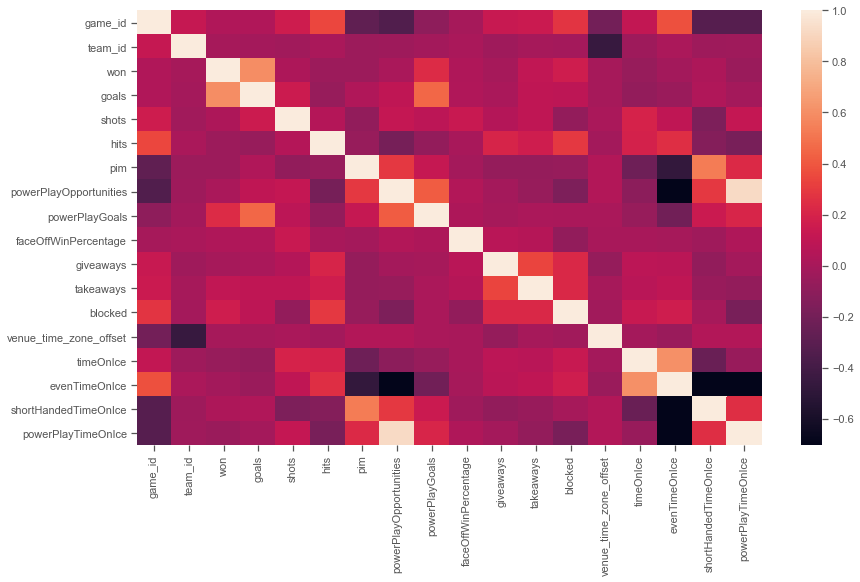

In [205]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr())


# Handling  missing values

### Check missing values

In [206]:
def missing_values(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(data.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [207]:
# Missing values statistics
miss_values = missing_values(data)
miss_values.head(20)

# if there is no column with missing value > 70%. thus we need to impute the missing values

Dataframe has 31 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
faceOffWinPercentage             22148               42.1
takeaways                         4928                9.4
hits                              4928                9.4
blocked                           4928                9.4
giveaways                         4928                9.4
home_rink_side_start              2392                4.5
startRinkSide                     2392                4.5
goalie_replacement                  35                0.1
timeOnIce                           28                0.1
evenTimeOnIce                       28                0.1
shortHandedTimeOnIce                28                0.1
powerPlayTimeOnIce                  28                0.1
head_coach                          28                0.1
powerPlayGoals                       8                0.0
goals                                8                0.0
powerPlayOpportunities               8                0.0
pim                                  8                0.0
shots                                8                0.0

In [208]:
# ! pip install missingno

### Nullity Matrix

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

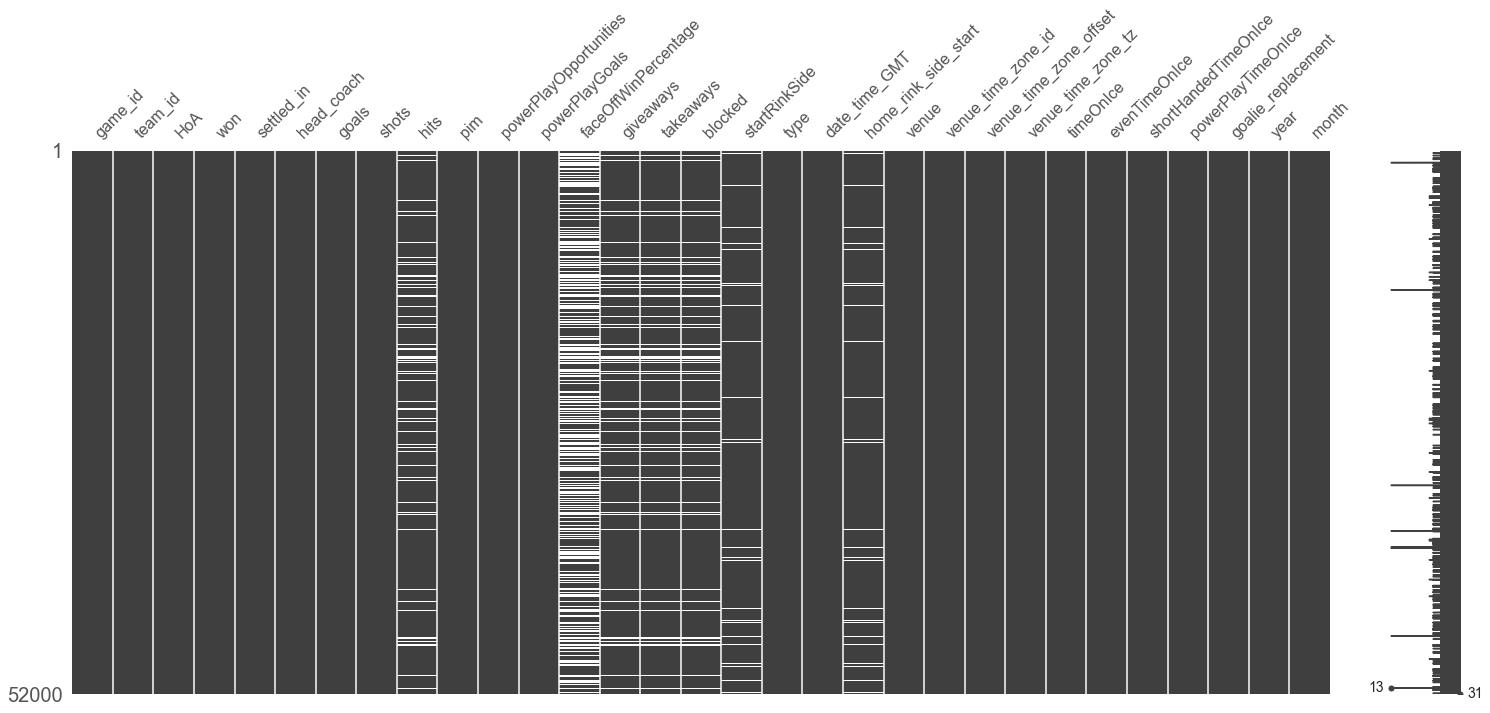

In [209]:
import missingno as msno
ax = msno.matrix(data.sample(52000))

<AxesSubplot:>

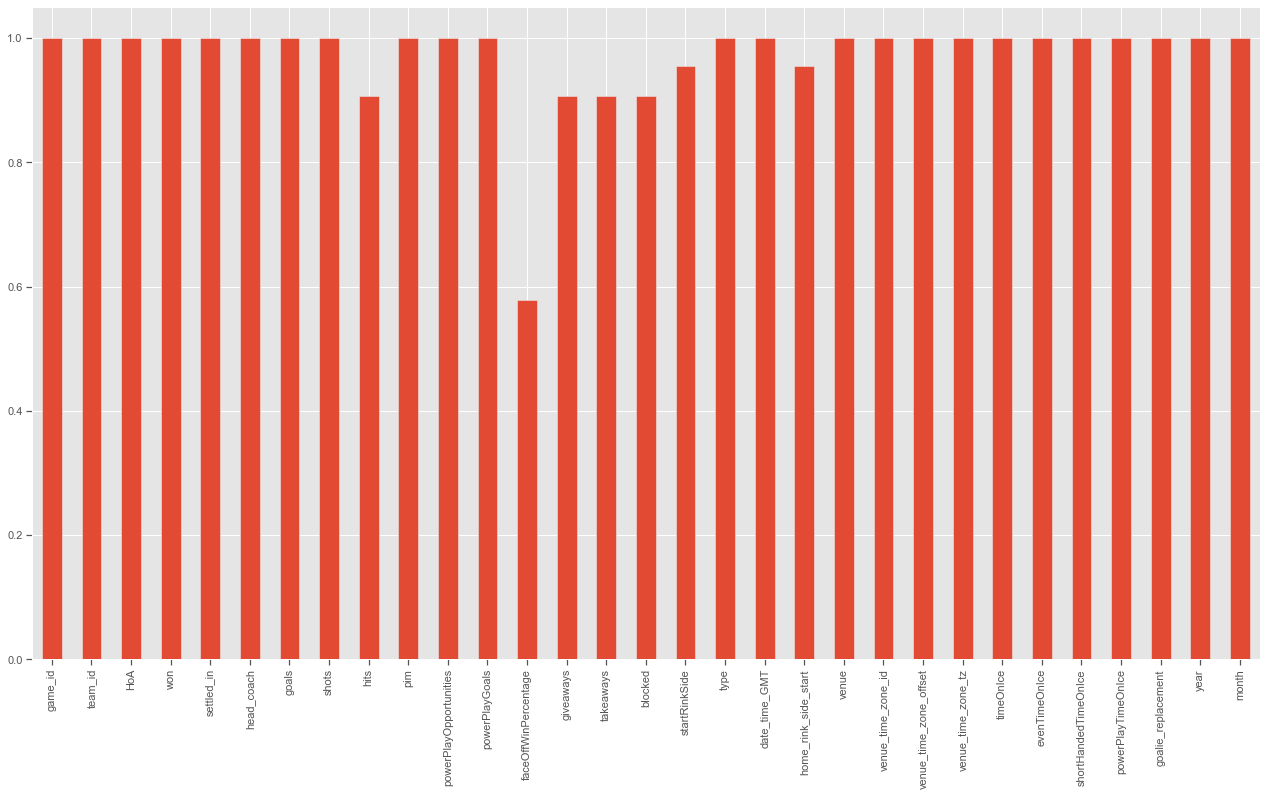

In [210]:
fig, ax = plt.subplots(figsize=(22, 12))
(1 - data.isnull().mean()).abs().plot.bar(ax=ax)

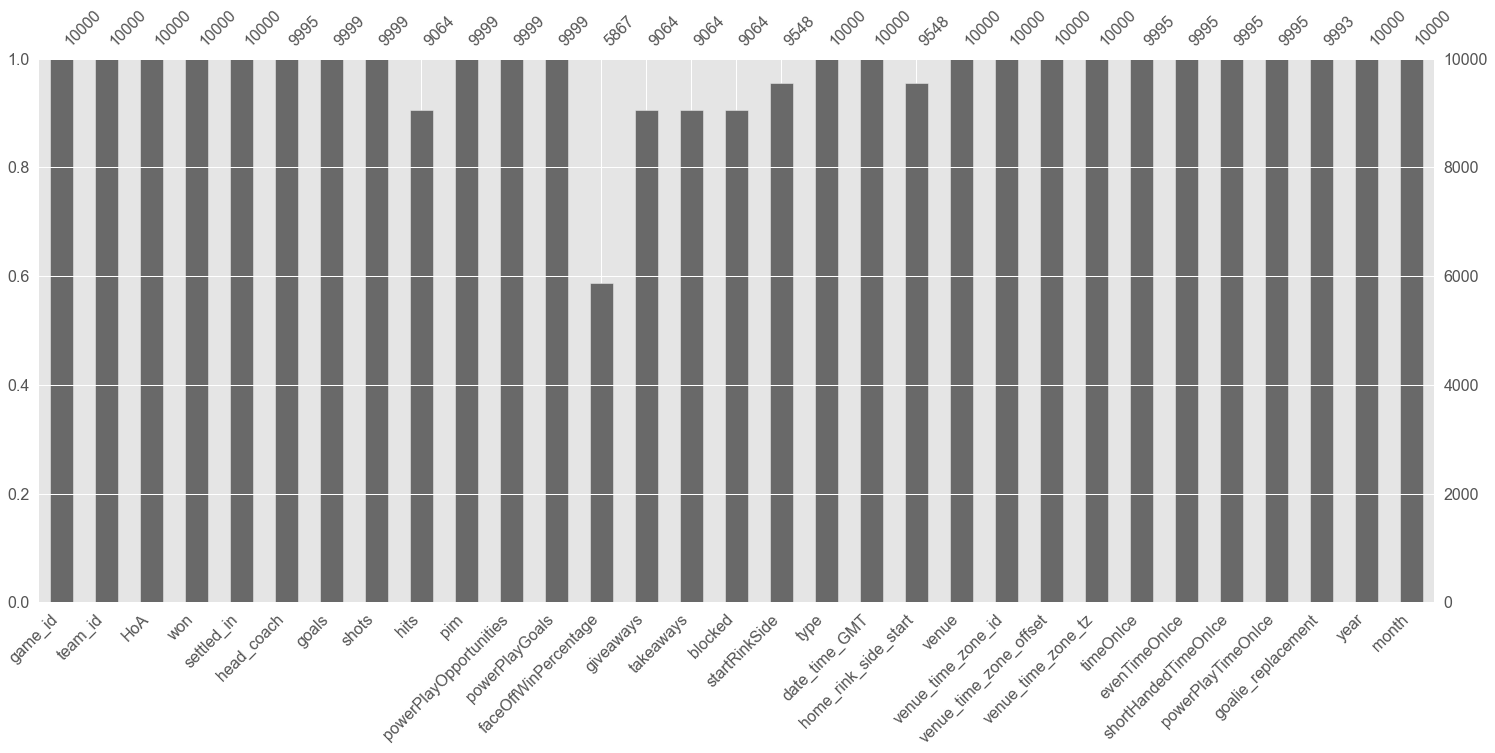

In [211]:
ax = msno.bar(data.sample(10000))


### Missingno correlation heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

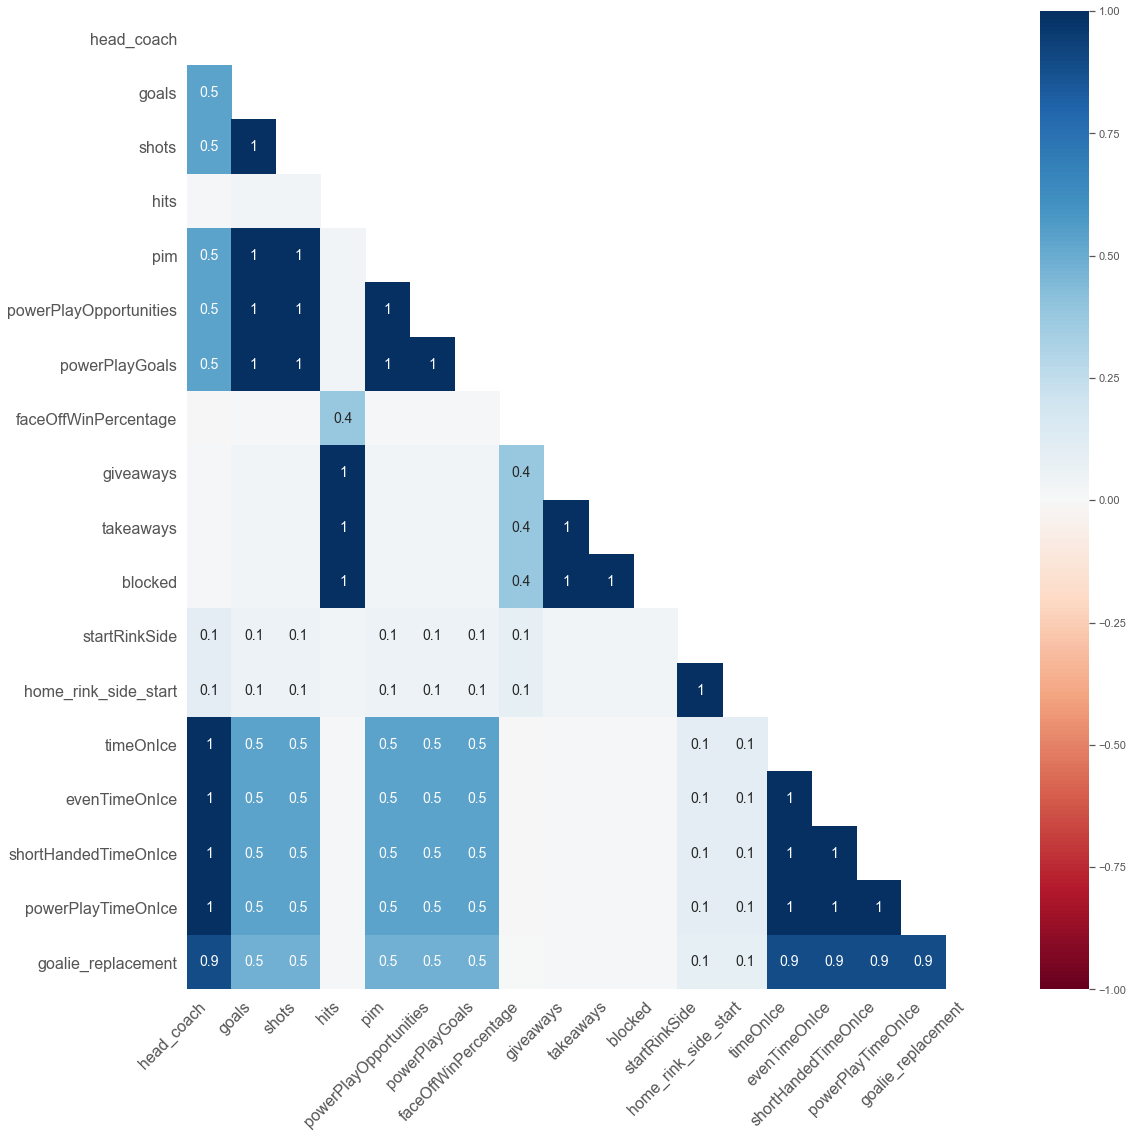

In [212]:
ax = msno.heatmap(data, figsize=(18, 18))

### Dendogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

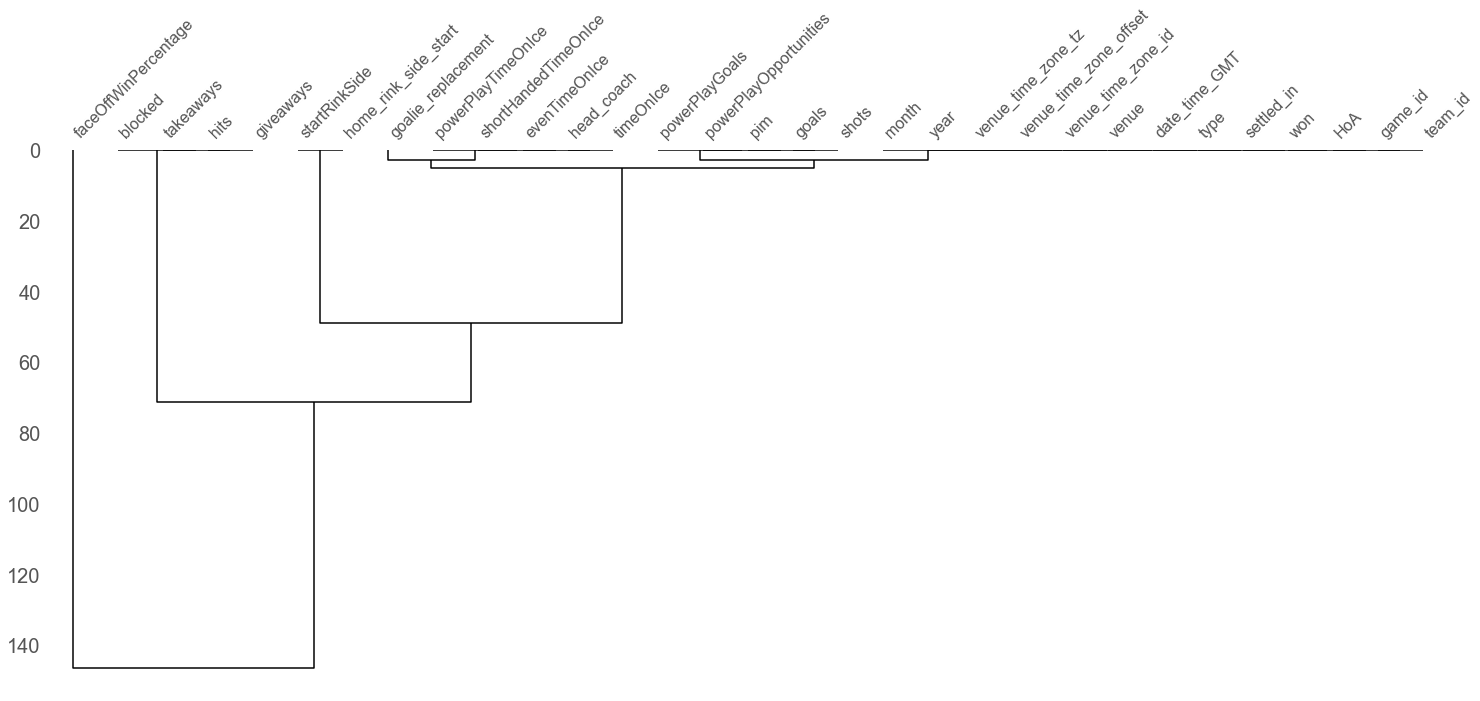

In [213]:
ax = msno.dendrogram(data)

## Fill the numerical missing values
the numerical values imputed using median value

In [214]:
data['faceOffWinPercentage'] = data['faceOffWinPercentage'].fillna(
    data['faceOffWinPercentage'].median())

data['takeaways'] = data['takeaways'].fillna(
    data['takeaways'].median())

data['hits'] = data['faceOffWinPercentage'].fillna(
    data['faceOffWinPercentage'].median())

data['blocked'] = data['blocked'].fillna(
    data['blocked'].median())

data['giveaways'] = data['giveaways'].fillna(
    data['giveaways'].median())

data['timeOnIce'] = data['timeOnIce'].fillna(
    data['timeOnIce'].median())

data['evenTimeOnIce'] = data['evenTimeOnIce'].fillna(
    data['evenTimeOnIce'].median())

data['shortHandedTimeOnIce'] = data['shortHandedTimeOnIce'].fillna(
    data['shortHandedTimeOnIce'].median())

data['powerPlayTimeOnIce'] = data['powerPlayTimeOnIce'].fillna(
    data['powerPlayTimeOnIce'].median())

data['powerPlayGoals'] = data['powerPlayGoals'].fillna(
    data['powerPlayGoals'].median())

data['powerPlayOpportunities'] = data['powerPlayOpportunities'].fillna(
    data['powerPlayOpportunities'].median())

data['pim'] = data['pim'].fillna(
    data['pim'].median())

data['goals'] = data['goals'].fillna(
    data['goals'].median())

data['shots'] = data['shots'].fillna(
    data['shots'].median())




In [215]:
data.head(10)

game_id  team_id   HoA    won settled_in        head_coach  goals  \
0  2016020045        4  away  False        REG      Dave Hakstol    4.0   
1  2016020045       16  home   True        REG  Joel Quenneville    7.0   
2  2017020812       24  away   True         OT     Randy Carlyle    4.0   
3  2017020812        7  home  False         OT      Phil Housley    3.0   
4  2015020314       21  away   True        REG       Patrick Roy    4.0   
5  2015020314       52  home  False        REG      Paul Maurice    1.0   
6  2015020849       52  away  False        REG      Paul Maurice    1.0   
7  2015020849       12  home   True        REG       Bill Peters    2.0   
8  2017020586       20  away  False        REG     Glen Gulutzan    1.0   
9  2017020586       24  home   True        REG     Randy Carlyle    2.0   

   shots  hits   pim  ...   venue_time_zone_id  venue_time_zone_offset  \
0   27.0  50.9   6.0  ...      America/Chicago                      -5   
1   28.0  49.1   8.0  ...      America/Chicago                      -5   
2   34.0  43.8   6.0  ...     America/New_York                      -4   
3   33.0  56.2   8.0  ...     America/New_York                      -4   
4   29.0  45.7   9.0  ...     America/Winnipeg                      -5   
5   21.0  54.3  11.0  ...     America/Winnipeg                      -5   
6   21.0  31.4  10.0  ...     America/New_York                      -4   
7   29.0  68.6   8.0  ...     America/New_York                      -4   
8   23.0  54.7  19.0  ...  America/Los_Angeles                      -7   
9   41.0  45.3  13.0  ...  America/Los_Angeles                      -7   

   venue_time_zone_tz    timeOnIce  evenTimeOnIce  shortHandedTimeOnIce  \
0                 CDT   990.833333     841.388889             55.555556   
1                 CDT   981.333333     836.777778             75.111111   
2                 EDT  1002.222222     879.611111             28.444444   
3                 EDT   999.222222     888.333333             75.333333   
4                 CDT   986.666667     844.722222             53.333333   
5                 CDT   986.722222     849.166667             70.888889   
6                 EDT   974.333333     763.055556            107.111111   
7                 EDT   973.444444     756.222222             83.333333   
8                 PDT   974.166667     785.277778            114.444444   
9                 PDT   979.611111     777.944444             59.555556   

  powerPlayTimeOnIce goalie_replacement  year month  
0          93.888889                Yes  2016    10  
1          69.444444                 No  2016    10  
2          94.166667                 No  2018    02  
3          35.555556                 No  2018    02  
4          88.611111                 No  2015    11  
5          66.666667                 No  2015    11  
6         104.166667                 No  2016    02  
7         133.888889                 No  2016    02  
8          74.444444                 No  2017    12  
9         142.111111                 No  2017    12  

[10 rows x 31 columns]

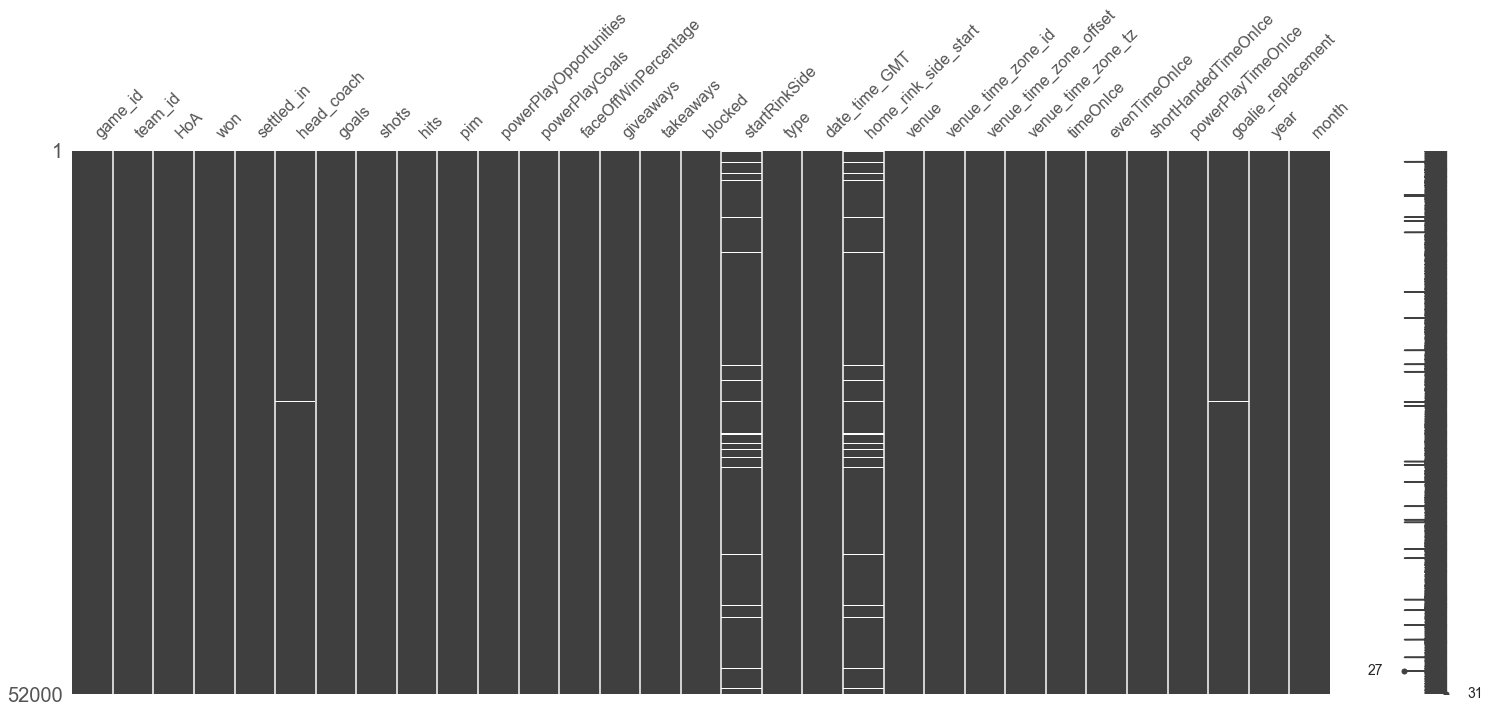

In [216]:
ax = msno.matrix(data.sample(52000))

In [217]:
data.isnull().sum()

game_id                      0
team_id                      0
HoA                          0
won                          0
settled_in                   0
head_coach                  28
goals                        0
shots                        0
hits                         0
pim                          0
powerPlayOpportunities       0
powerPlayGoals               0
faceOffWinPercentage         0
giveaways                    0
takeaways                    0
blocked                      0
startRinkSide             2392
type                         0
date_time_GMT                0
home_rink_side_start      2392
venue                        0
venue_time_zone_id           0
venue_time_zone_offset       0
venue_time_zone_tz           0
timeOnIce                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
goalie_replacement          35
year                         0
month                        0
dtype: int64

In [218]:
data.head_coach.head(5)

0        Dave Hakstol
1    Joel Quenneville
2       Randy Carlyle
3        Phil Housley
4         Patrick Roy
Name: head_coach, dtype: object

In [252]:
# copy the dataframe
df= data.copy()

In [253]:
df.isnull().sum()

game_id                      0
team_id                      0
HoA                          0
won                          0
settled_in                   0
head_coach                  28
goals                        0
shots                        0
hits                         0
pim                          0
powerPlayOpportunities       0
powerPlayGoals               0
faceOffWinPercentage         0
giveaways                    0
takeaways                    0
blocked                      0
startRinkSide             2392
type                         0
date_time_GMT                0
home_rink_side_start      2392
venue                        0
venue_time_zone_id           0
venue_time_zone_offset       0
venue_time_zone_tz           0
timeOnIce                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
goalie_replacement          35
year                         0
month                        0
dtype: int64

In [254]:
# fill the column with its own most frequent value
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))



In [255]:
df.isnull().sum()

game_id                   0
team_id                   0
HoA                       0
won                       0
settled_in                0
head_coach                0
goals                     0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
blocked                   0
startRinkSide             0
type                      0
date_time_GMT             0
home_rink_side_start      0
venue                     0
venue_time_zone_id        0
venue_time_zone_offset    0
venue_time_zone_tz        0
timeOnIce                 0
evenTimeOnIce             0
shortHandedTimeOnIce      0
powerPlayTimeOnIce        0
goalie_replacement        0
year                      0
month                     0
dtype: int64

In [256]:
df.head(10)

game_id  team_id   HoA    won settled_in        head_coach  goals  \
0  2016020045        4  away  False        REG      Dave Hakstol    4.0   
1  2016020045       16  home   True        REG  Joel Quenneville    7.0   
2  2017020812       24  away   True         OT     Randy Carlyle    4.0   
3  2017020812        7  home  False         OT      Phil Housley    3.0   
4  2015020314       21  away   True        REG       Patrick Roy    4.0   
5  2015020314       52  home  False        REG      Paul Maurice    1.0   
6  2015020849       52  away  False        REG      Paul Maurice    1.0   
7  2015020849       12  home   True        REG       Bill Peters    2.0   
8  2017020586       20  away  False        REG     Glen Gulutzan    1.0   
9  2017020586       24  home   True        REG     Randy Carlyle    2.0   

   shots  hits   pim  ...   venue_time_zone_id  venue_time_zone_offset  \
0   27.0  50.9   6.0  ...      America/Chicago                      -5   
1   28.0  49.1   8.0  ...      America/Chicago                      -5   
2   34.0  43.8   6.0  ...     America/New_York                      -4   
3   33.0  56.2   8.0  ...     America/New_York                      -4   
4   29.0  45.7   9.0  ...     America/Winnipeg                      -5   
5   21.0  54.3  11.0  ...     America/Winnipeg                      -5   
6   21.0  31.4  10.0  ...     America/New_York                      -4   
7   29.0  68.6   8.0  ...     America/New_York                      -4   
8   23.0  54.7  19.0  ...  America/Los_Angeles                      -7   
9   41.0  45.3  13.0  ...  America/Los_Angeles                      -7   

   venue_time_zone_tz    timeOnIce  evenTimeOnIce  shortHandedTimeOnIce  \
0                 CDT   990.833333     841.388889             55.555556   
1                 CDT   981.333333     836.777778             75.111111   
2                 EDT  1002.222222     879.611111             28.444444   
3                 EDT   999.222222     888.333333             75.333333   
4                 CDT   986.666667     844.722222             53.333333   
5                 CDT   986.722222     849.166667             70.888889   
6                 EDT   974.333333     763.055556            107.111111   
7                 EDT   973.444444     756.222222             83.333333   
8                 PDT   974.166667     785.277778            114.444444   
9                 PDT   979.611111     777.944444             59.555556   

  powerPlayTimeOnIce goalie_replacement  year month  
0          93.888889                Yes  2016    10  
1          69.444444                 No  2016    10  
2          94.166667                 No  2018    02  
3          35.555556                 No  2018    02  
4          88.611111                 No  2015    11  
5          66.666667                 No  2015    11  
6         104.166667                 No  2016    02  
7         133.888889                 No  2016    02  
8          74.444444                 No  2017    12  
9         142.111111                 No  2017    12  

[10 rows x 31 columns]

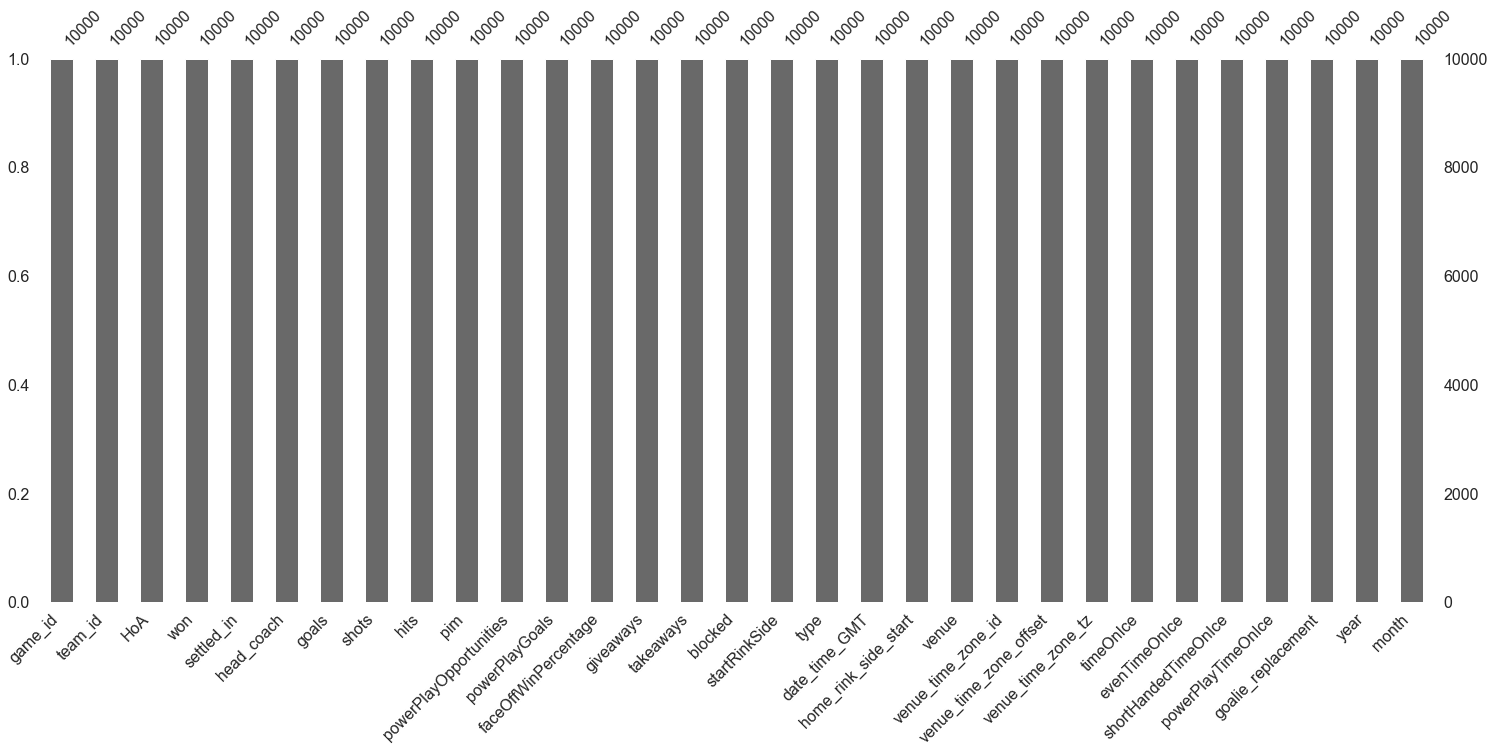

In [257]:
ax = msno.bar(df.sample(10000))



## Create Target Variable
Convert the boolean to integer 

In [258]:
df["won"] = df["won"].astype(int)


In [259]:
df['won'].value_counts()

0    26947
1    25663
Name: won, dtype: int64

In [260]:
df.head(6)

game_id  team_id   HoA  won settled_in        head_coach  goals  shots  \
0  2016020045        4  away    0        REG      Dave Hakstol    4.0   27.0   
1  2016020045       16  home    1        REG  Joel Quenneville    7.0   28.0   
2  2017020812       24  away    1         OT     Randy Carlyle    4.0   34.0   
3  2017020812        7  home    0         OT      Phil Housley    3.0   33.0   
4  2015020314       21  away    1        REG       Patrick Roy    4.0   29.0   
5  2015020314       52  home    0        REG      Paul Maurice    1.0   21.0   

   hits   pim  ...  venue_time_zone_id  venue_time_zone_offset  \
0  50.9   6.0  ...     America/Chicago                      -5   
1  49.1   8.0  ...     America/Chicago                      -5   
2  43.8   6.0  ...    America/New_York                      -4   
3  56.2   8.0  ...    America/New_York                      -4   
4  45.7   9.0  ...    America/Winnipeg                      -5   
5  54.3  11.0  ...    America/Winnipeg                      -5   

   venue_time_zone_tz    timeOnIce  evenTimeOnIce  shortHandedTimeOnIce  \
0                 CDT   990.833333     841.388889             55.555556   
1                 CDT   981.333333     836.777778             75.111111   
2                 EDT  1002.222222     879.611111             28.444444   
3                 EDT   999.222222     888.333333             75.333333   
4                 CDT   986.666667     844.722222             53.333333   
5                 CDT   986.722222     849.166667             70.888889   

  powerPlayTimeOnIce goalie_replacement  year month  
0          93.888889                Yes  2016    10  
1          69.444444                 No  2016    10  
2          94.166667                 No  2018    02  
3          35.555556                 No  2018    02  
4          88.611111                 No  2015    11  
5          66.666667                 No  2015    11  

[6 rows x 31 columns]

In [261]:
corr = df.corr()['won'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
hits                    0.023102
faceOffWinPercentage    0.023102
shots                   0.025197
shortHandedTimeOnIce    0.027572
game_id                 0.035644
takeaways               0.101526
blocked                 0.158984
powerPlayGoals          0.240915
goals                   0.596595
won                     1.000000
Name: won, dtype: float64

Top 10 - Negative Correlations:
------------------------------
timeOnIce                -0.061069
powerPlayTimeOnIce       -0.046904
pim                      -0.040199
evenTimeOnIce            -0.014485
giveaways                -0.003083
venue_time_zone_offset   -0.001869
team_id                  -0.001185
powerPlayOpportunities    0.014103
hits                      0.023102
faceOffWinPercentage      0.023102
Name: won, dtype: float64


[Text(0.5, 0, 'game_id'),
 Text(1.5, 0, 'team_id'),
 Text(2.5, 0, 'won'),
 Text(3.5, 0, 'goals'),
 Text(4.5, 0, 'shots'),
 Text(5.5, 0, 'hits'),
 Text(6.5, 0, 'pim'),
 Text(7.5, 0, 'powerPlayOpportunities'),
 Text(8.5, 0, 'powerPlayGoals'),
 Text(9.5, 0, 'faceOffWinPercentage'),
 Text(10.5, 0, 'giveaways'),
 Text(11.5, 0, 'takeaways'),
 Text(12.5, 0, 'blocked'),
 Text(13.5, 0, 'venue_time_zone_offset'),
 Text(14.5, 0, 'timeOnIce'),
 Text(15.5, 0, 'evenTimeOnIce'),
 Text(16.5, 0, 'shortHandedTimeOnIce'),
 Text(17.5, 0, 'powerPlayTimeOnIce')]

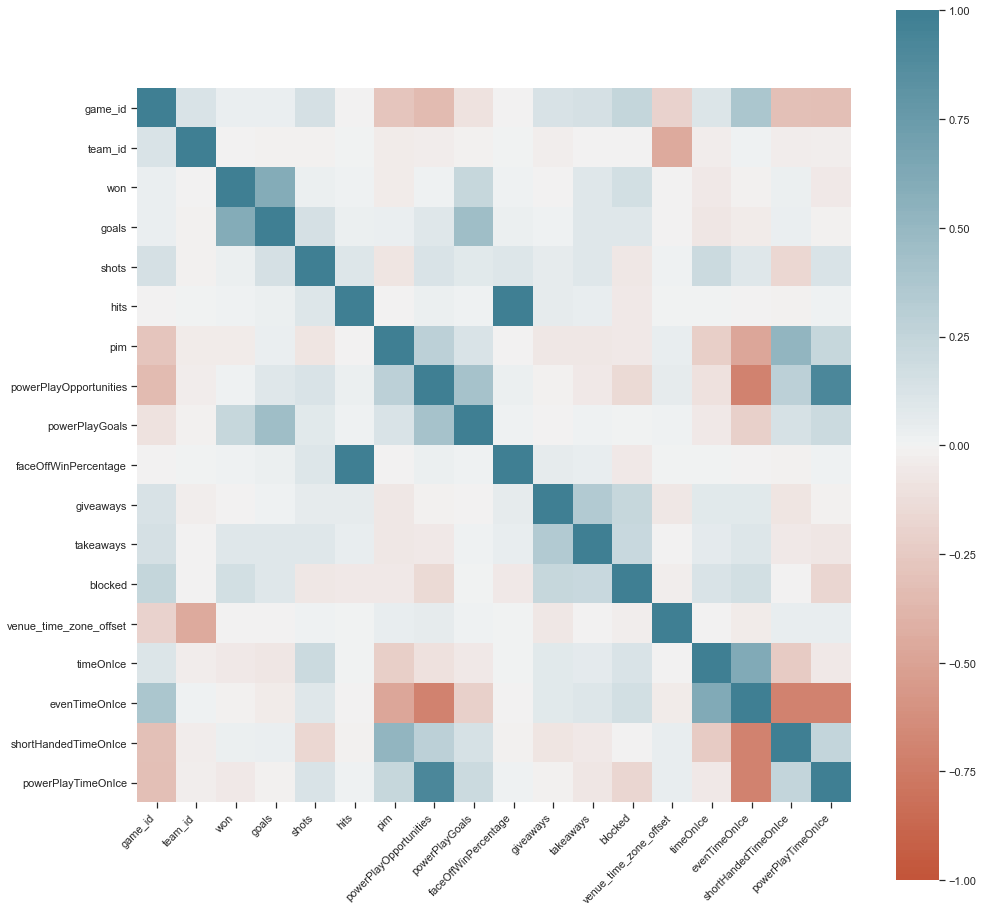

In [262]:
correlation = df.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



## Insights
* **Positive Correlations** :

    * there is positive correlation between powerPlayTimeonice and powerPlayOpportunities 
    * there is positive correlation between faceOffWinPercentage and hits

* **Negative Correlations**:

    * there is negative correlation evenTimeOnIce and powerPlayOpportunities
    * there is negative correlation evenTimeOnIce and powerPlayTimeonice
    * there is negative correlation evenTimeOnIce and shortHandedTimeOnIce
    

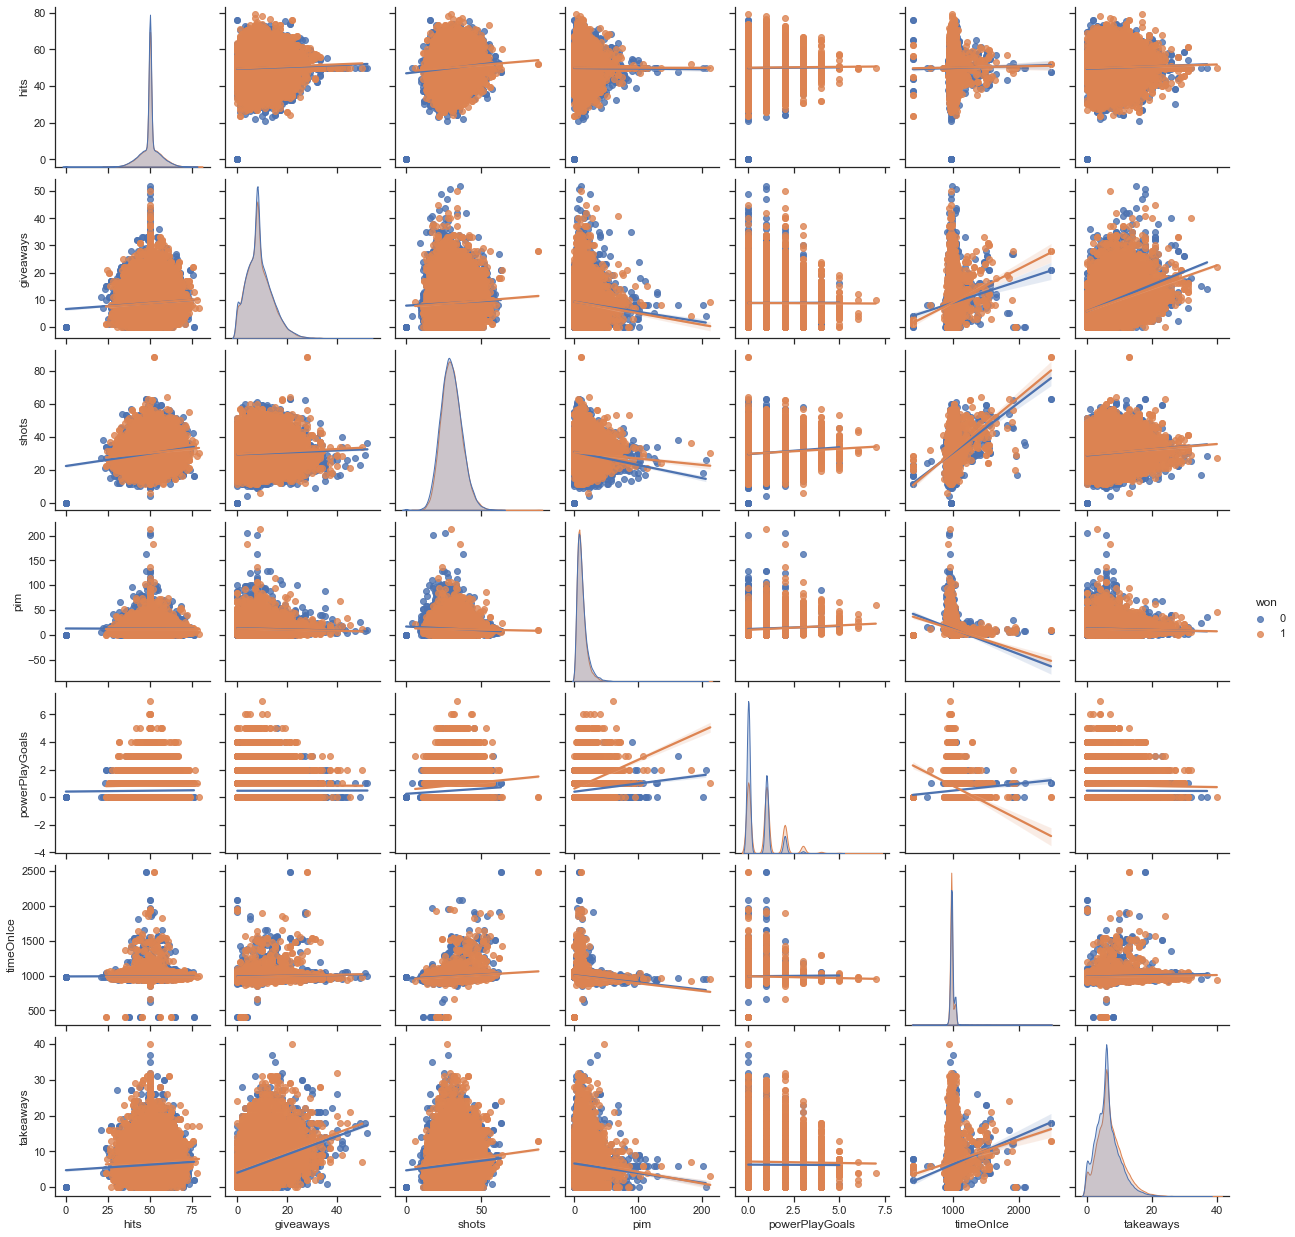

In [263]:
from seaborn import pairplot


sns.set(style="ticks")

vars= ["hits", "giveaways", "shots","pim","powerPlayGoals","timeOnIce","takeaways"]

p = pairplot(
    df, vars=vars, hue="won", kind="reg"
)



## Count of columns with specific data types


Text(0, 0.5, 'Data type')

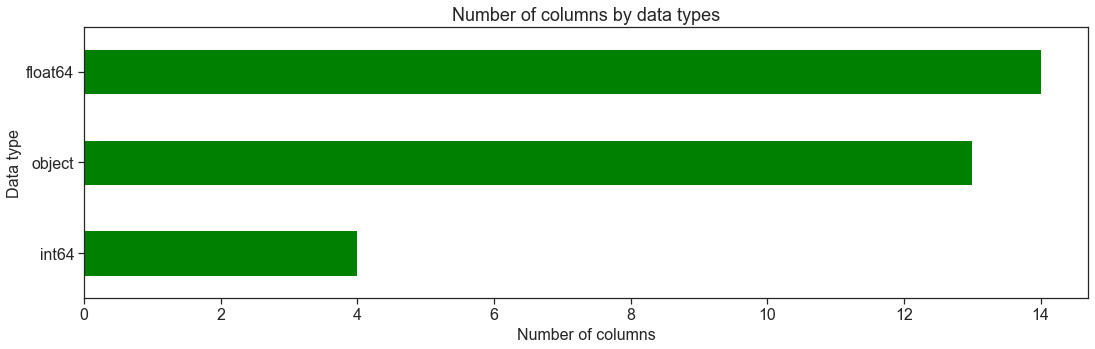

In [264]:
df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

## Count number of categories for each object data 
We will need to deal with categorical data

In [265]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

HoA                         2
settled_in                  3
head_coach                146
startRinkSide               2
type                        3
date_time_GMT           14468
home_rink_side_start        2
venue                     116
venue_time_zone_id         11
venue_time_zone_tz          8
goalie_replacement          2
year                       21
month                      11
dtype: int64

## Distribution of Categorical Variables


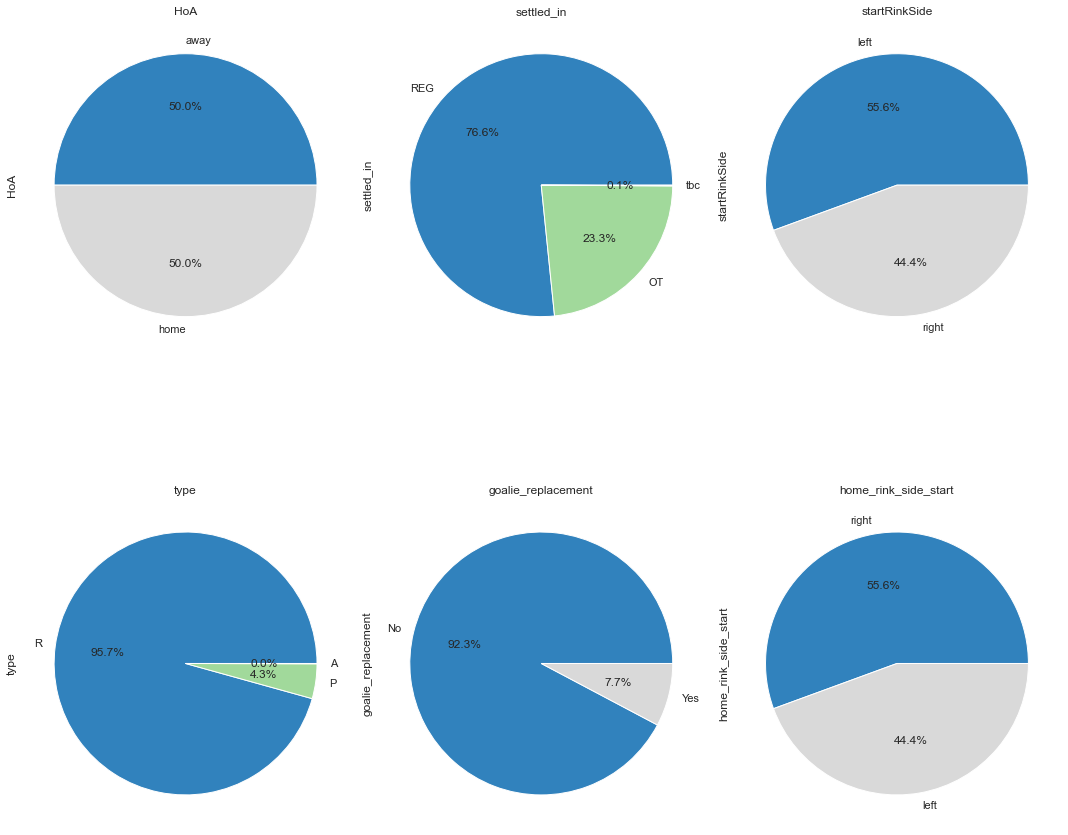

In [266]:
cat_vars = df[['HoA','settled_in','startRinkSide','type','goalie_replacement','home_rink_side_start']]
#cat_vars.columns

fig, axes = plt.subplots(round(len(cat_vars.columns) / 4), 3, figsize=(15, 15))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        cat_vars[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colormap='tab20c')
        ax.set_title(cat_vars.columns[i])

fig.tight_layout();

In [288]:
# Plotting 3-D  {powerPlayGoals, won, shots}

fig = px.scatter_3d(df, x="powerPlayGoals", y="won", z="shots", color="goals")
fig.show()

In [289]:
# check  time spent on the ice impacts the outcome of the game

px.scatter(df, x = 'timeOnIce', y="shots", color = 'won', title='The Impact of Time Spent On The Ice',height=700)



# Data Clean up
Drop the features that are not usefull for the model.

In [269]:
df.columns

Index(['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide', 'type', 'date_time_GMT', 'home_rink_side_start',
       'venue', 'venue_time_zone_id', 'venue_time_zone_offset',
       'venue_time_zone_tz', 'timeOnIce', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'goalie_replacement',
       'year', 'month'],
      dtype='object')

In [270]:
df.drop(['game_id', 'team_id', 'venue_time_zone_id', 'date_time_GMT', 'venue_time_zone_offset','venue_time_zone_tz','head_coach','venue'],
        axis=1,
        inplace=True)

In [271]:
df.columns

Index(['HoA', 'won', 'settled_in', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'blocked', 'startRinkSide', 'type',
       'home_rink_side_start', 'timeOnIce', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'goalie_replacement',
       'year', 'month'],
      dtype='object')

In [272]:
# remove correlated variables

df.drop(['powerPlayOpportunities','faceOffWinPercentage','evenTimeOnIce'], axis=1, inplace=True)

In [273]:
df.shape

(52610, 20)

## Categorical Encodings
one-hot encoding is used for categorical encoding. There is no need to use label encoding because there is no ordinal variables in the dataset.

In [274]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

HoA                      2
settled_in               3
startRinkSide            2
type                     3
home_rink_side_start     2
goalie_replacement       2
year                    21
month                   11
dtype: int64

In [275]:
df = pd.get_dummies(df, columns=['HoA','settled_in', 'startRinkSide','type','home_rink_side_start','goalie_replacement'])


print(df.shape)



(52610, 28)


In [276]:
df.head(6)

won  goals  shots  hits   pim  powerPlayGoals  giveaways  takeaways  \
0    0    4.0   27.0  50.9   6.0             2.0       12.0        9.0   
1    1    7.0   28.0  49.1   8.0             2.0       16.0        8.0   
2    1    4.0   34.0  43.8   6.0             1.0        7.0        4.0   
3    0    3.0   33.0  56.2   8.0             1.0        5.0        6.0   
4    1    4.0   29.0  45.7   9.0             1.0       13.0        5.0   
5    0    1.0   21.0  54.3  11.0             0.0       13.0        7.0   

   blocked    timeOnIce  ...  settled_in_tbc  startRinkSide_left  \
0     11.0   990.833333  ...               0                   1   
1      9.0   981.333333  ...               0                   1   
2     14.0  1002.222222  ...               0                   0   
3     14.0   999.222222  ...               0                   0   
4     20.0   986.666667  ...               0                   1   
5      9.0   986.722222  ...               0                   1   

  startRinkSide_right type_A  type_P  type_R  home_rink_side_start_left  \
0                   0      0       0       1                          0   
1                   0      0       0       1                          0   
2                   1      0       0       1                          1   
3                   1      0       0       1                          1   
4                   0      0       0       1                          0   
5                   0      0       0       1                          0   

   home_rink_side_start_right  goalie_replacement_No  goalie_replacement_Yes  
0                           1                      0                       1  
1                           1                      1                       0  
2                           0                      1                       0  
3                           0                      1                       0  
4                           1                      1                       0  
5                           1                      1                       0  

[6 rows x 28 columns]

## Outliers check

Text(0, 0.5, 'Values')

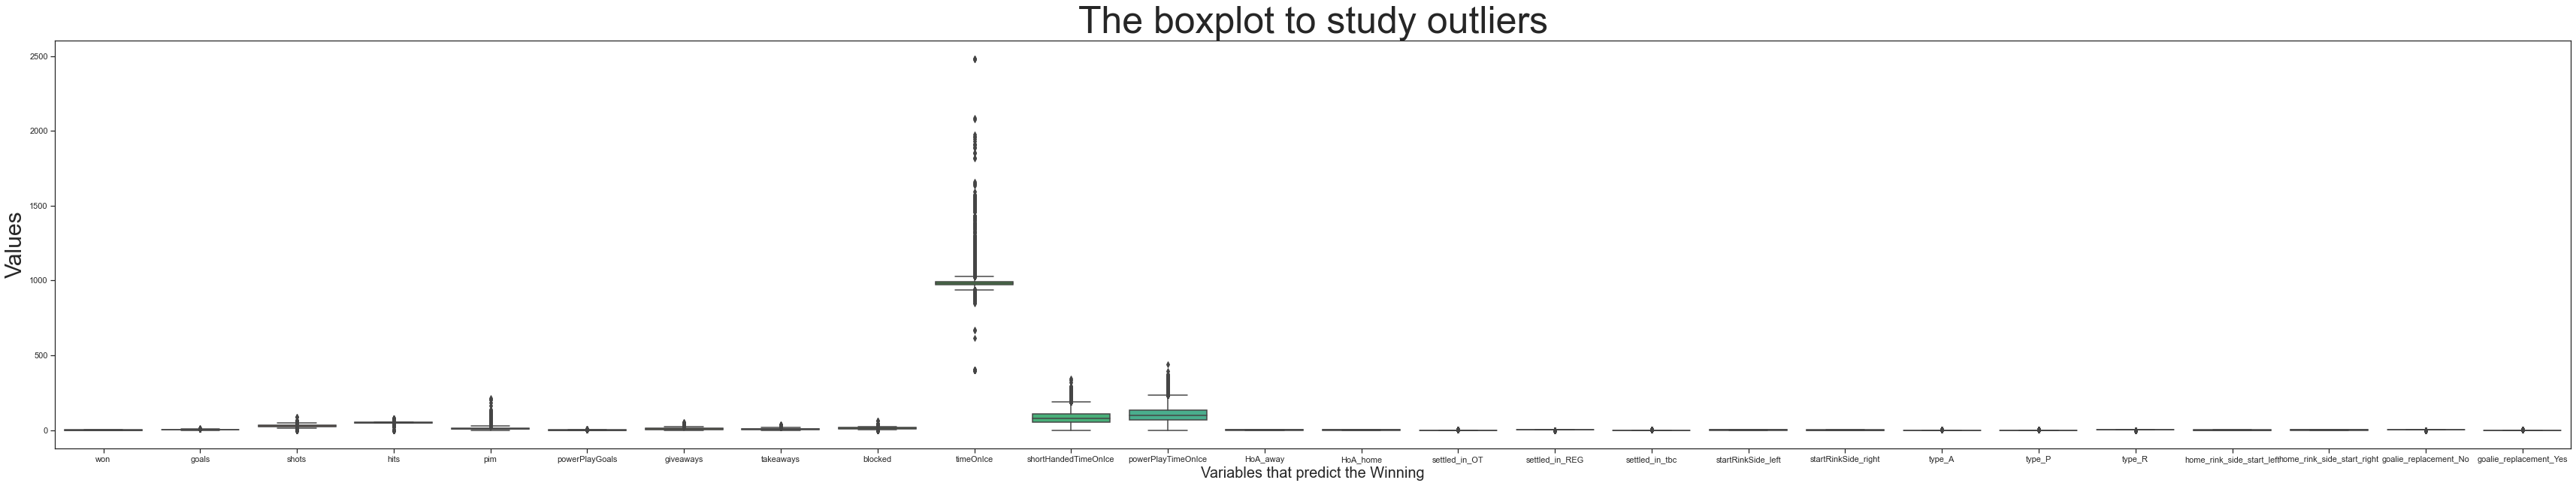

In [277]:
# outliers check

plt.figure(figsize=(60,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers',fontsize=50)
plt.xlabel('Variables that predict the Winning',fontsize=20)
plt.ylabel('Values',fontsize=30)

### most outlier variables located in the  "timeOnIce","shortHandedTimeOnIce","powerPlayTimeOnIce"

In [278]:
from sklearn.ensemble import IsolationForest # Return the anomaly score 

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(df)
score = iforest.decision_function(df)

from numpy import where
anom_index = where(pred== -1)
values = df.iloc[anom_index]
values

won  goals  shots  hits   pim  powerPlayGoals  giveaways  takeaways  \
122      1    5.0   25.0  41.5   4.0             0.0       14.0        5.0   
273      0    3.0   29.0  39.1  96.0             0.0       10.0        8.0   
274      1    6.0   42.0  60.9  75.0             1.0       10.0       10.0   
457      1    3.0   44.0  58.1   6.0             1.0        4.0        0.0   
719      1    3.0   41.0  71.8  40.0             2.0        5.0        2.0   
...    ...    ...    ...   ...   ...             ...        ...        ...   
52565    0    4.0   32.0  52.3   2.0             1.0        9.0       13.0   
52590    1    7.0   24.0  55.6  16.0             4.0        4.0       11.0   
52591    0    2.0   29.0  44.4  14.0             1.0        7.0       11.0   
52592    1    7.0   24.0  55.6  16.0             4.0        4.0       11.0   
52593    0    2.0   29.0  44.4  14.0             1.0        7.0       11.0   

       blocked    timeOnIce  ...  settled_in_tbc  startRinkSide_left  \
122       12.0  1043.222222  ...               0                   1   
273       16.0   954.888889  ...               0                   1   
274       13.0   956.833333  ...               0                   1   
457        9.0  1010.666667  ...               0                   1   
719       15.0   950.000000  ...               0                   1   
...        ...          ...  ...             ...                 ...   
52565     24.0  1083.055556  ...               0                   0   
52590     19.0   959.666667  ...               0                   0   
52591      7.0   990.777778  ...               0                   0   
52592     19.0   959.666667  ...               0                   0   
52593      7.0   990.777778  ...               0                   0   

      startRinkSide_right type_A  type_P  type_R  home_rink_side_start_left  \
122                     0      0       0       1                          0   
273                     0      0       0       1                          0   
274                     0      0       0       1                          0   
457                     0      0       0       1                          0   
719                     0      0       0       1                          0   
...                   ...    ...     ...     ...                        ...   
52565                   1      0       1       0                          1   
52590                   1      0       1       0                          1   
52591                   1      0       1       0                          1   
52592                   1      0       1       0                          1   
52593                   1      0       1       0                          1   

       home_rink_side_start_right  goalie_replacement_No  \
122                             1                      0   
273                             1                      0   
274                             1                      0   
457                             1                      0   
719                             1                      0   
...                           ...                    ...   
52565                           0                      1   
52590                           0                      1   
52591                           0                      0   
52592                           0                      1   
52593                           0                      0   

       goalie_replacement_Yes  
122                         1  
273                         1  
274                         1  
457                         1  
719                         1  
...                       ...  
52565                       0  
52590                       0  
52591                       1  
52592                       0  
52593                       1  

[1053 rows x 28 columns]

In [279]:
# there were 1053 outiliers detected

values.shape

(1053, 28)

In [280]:
# the remove the outliers detected

df = df[~df.index.isin(values.index)]
df.shape

(51557, 28)

## Feature selection

In [281]:
from sklearn.model_selection import train_test_split
# define x and y

X, y = df.drop(['won'], axis=1), df.won

# split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)




In [282]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

predictor  feature importance
20                      type_A            0.000000
17              settled_in_tbc            0.000042
21                      type_P            0.001761
22                      type_R            0.001810
18          startRinkSide_left            0.004538
19         startRinkSide_right            0.004607
23   home_rink_side_start_left            0.004637
24  home_rink_side_start_right            0.004686
13                    HoA_away            0.005719
14                    HoA_home            0.005739
15               settled_in_OT            0.011413
16              settled_in_REG            0.011625
26      goalie_replacement_Yes            0.017874
25       goalie_replacement_No            0.019224
12                       month            0.028275
4               powerPlayGoals            0.033115
2                         hits            0.037273
6                    takeaways            0.037359
5                    giveaways            0.040090
11                        year            0.043988
3                          pim            0.046121
1                        shots            0.047919
7                      blocked            0.048641
10          powerPlayTimeOnIce            0.054715
9         shortHandedTimeOnIce            0.063989
8                    timeOnIce            0.103033
0                        goals            0.321808

##  Insights:

the least important predictors should be removed

* **type_A**

* **settled_in_tbc**

* **type_P**

* **type_R** 


In [283]:
X_train = X_train.drop(['type_A'], axis=1)
X_train = X_train.drop(['settled_in_tbc'], axis=1)
X_train = X_train.drop(['type_P'], axis=1)
X_train = X_train.drop(['type_R'], axis=1)

X_test= X_test.drop(['type_A'], axis=1)
X_test= X_test.drop(['settled_in_tbc'], axis=1)
X_test= X_test.drop(['type_P'], axis=1)
X_test= X_test.drop(['type_R'], axis=1)







In [114]:
# standarize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.fit_transform(X_test)

In [ ]:
# export the dataset for modeling

In [284]:
df.drop(['type_A','type_P','type_R','settled_in_tbc'], axis=1)

won  goals  shots  hits   pim  powerPlayGoals  giveaways  takeaways  \
0        0    4.0   27.0  50.9   6.0             2.0       12.0        9.0   
1        1    7.0   28.0  49.1   8.0             2.0       16.0        8.0   
2        1    4.0   34.0  43.8   6.0             1.0        7.0        4.0   
3        0    3.0   33.0  56.2   8.0             1.0        5.0        6.0   
4        1    4.0   29.0  45.7   9.0             1.0       13.0        5.0   
...    ...    ...    ...   ...   ...             ...        ...        ...   
52605    0    1.0   29.0  58.7  20.0             0.0       12.0       11.0   
52606    1    4.0   20.0  49.0   2.0             0.0        7.0        8.0   
52607    0    1.0   33.0  51.0   0.0             0.0       13.0        6.0   
52608    1    4.0   20.0  49.0   2.0             0.0        7.0        8.0   
52609    0    1.0   33.0  51.0   0.0             0.0       13.0        6.0   

       blocked    timeOnIce  ...  HoA_away  HoA_home settled_in_OT  \
0         11.0   990.833333  ...         1         0             0   
1          9.0   981.333333  ...         0         1             0   
2         14.0  1002.222222  ...         1         0             1   
3         14.0   999.222222  ...         0         1             1   
4         20.0   986.666667  ...         1         0             0   
...        ...          ...  ...       ...       ...           ...   
52605      9.0   992.833333  ...         0         1             0   
52606     21.0   993.333333  ...         1         0             0   
52607      7.0  1011.444444  ...         0         1             0   
52608     21.0   993.333333  ...         1         0             0   
52609      7.0  1011.444444  ...         0         1             0   

      settled_in_REG  startRinkSide_left  startRinkSide_right  \
0                  1                   1                    0   
1                  1                   1                    0   
2                  0                   0                    1   
3                  0                   0                    1   
4                  1                   1                    0   
...              ...                 ...                  ...   
52605              1                   0                    1   
52606              1                   0                    1   
52607              1                   0                    1   
52608              1                   0                    1   
52609              1                   0                    1   

       home_rink_side_start_left  home_rink_side_start_right  \
0                              0                           1   
1                              0                           1   
2                              1                           0   
3                              1                           0   
4                              0                           1   
...                          ...                         ...   
52605                          1                           0   
52606                          1                           0   
52607                          1                           0   
52608                          1                           0   
52609                          1                           0   

       goalie_replacement_No  goalie_replacement_Yes  
0                          0                       1  
1                          1                       0  
2                          1                       0  
3                          1                       0  
4                          1                       0  
...                      ...                     ...  
52605                      1                       0  
52606                      1                       0  
52607                      1                       0  
52608                      1                       0  
52609                      1                       0  

[51557 rows x 24 c

In [287]:
df.to_csv("readyformodel.csv", index= False)